# Million Rows Data Analysis

## Part II: Gender Behavior, Detailed (Male)

Preliminaries, as usual.

In [1]:
import os
import datetime

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# remove warnings
import warnings
warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None
# ---

pd.options.display.max_columns= 2000

%matplotlib inline

In [2]:
datafile="1M-data"+"m"
data=pd.read_csv(datafile+".csv")

In [3]:
print data.shape
print list(data)
print data.liked.mean()
data.liked.describe()

(695762, 17)
['p1_age', 'p1_country', 'p1_education', 'p1_ethnicity', 'p1_flavor', 'p1_languages', 'liked', 'p1_premium', 'p1_religiosity', 'p2_age', 'p2_country', 'p2_education', 'p2_ethnicity', 'p2_flavor', 'p2_languages', 'p2_premium', 'p2_religiosity']
0.586549710964


count     695762
unique         2
top         True
freq      408099
Name: liked, dtype: object

Adding Information if the country is same or not... reduces our cross-categories by a lot.

In [4]:
data['same_country']=(data['p1_country']==data['p2_country'])

... similarly for the religion-flavor.

In [5]:
data['same_religion']=(data['p1_flavor']==data['p2_flavor'])

## Handeling the numeric data and the associated N/A

In [6]:
print data.shape
data.describe().loc['count',:]

(695762, 19)


p1_age            685263.0
p1_religiosity    480233.0
p2_age            661202.0
p2_religiosity    479569.0
Name: count, dtype: float64

In [7]:
print data.p1_religiosity.mean()
print data.p1_religiosity.median()
print data.p2_religiosity.mean()
print data.p2_religiosity.median()

2.82244261767
2.93272171254
2.90213930196
3.0


In [8]:
print data.p1_age.mean()
print data.p1_age.median()
print data.p2_age.mean()
print data.p2_age.median()

27.5324043469
27.0
25.541991706
25.0


In [9]:
data.p1_age.fillna(data.p1_age.median(), inplace=True)
data.p2_age.fillna(data.p2_age.median(), inplace=True)
data.p1_religiosity.fillna(data.p1_religiosity.mean(), inplace=True)
data.p2_religiosity.fillna(data.p2_religiosity.mean(), inplace=True)

# Analysis begins

## 1. Country wise

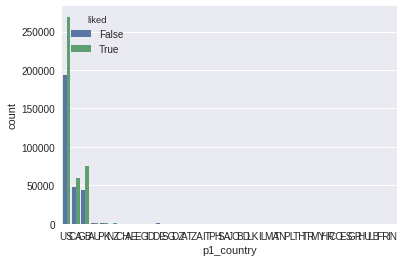

In [10]:
sns.countplot(x="p1_country", hue='liked', data=data);

Let us look at the normalized data to make sense.

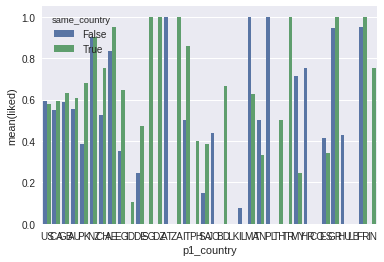

In [11]:
sns.barplot(x="p1_country", y='liked', hue='same_country', data=data, ci=None);

### Checking the liked-profiles country-wise.

Since there are three distinct groups as far as the frequency is concerned:  
1. US
2. CA/GB
3. The rest of the world

Let us separately see them.

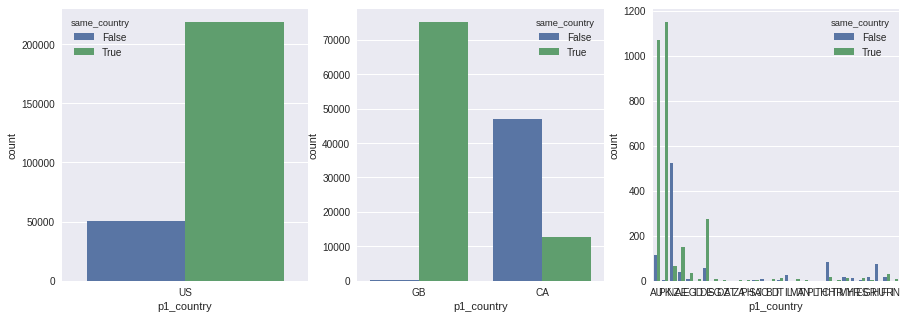

In [12]:
fig, ax =plt.subplots(nrows=1, ncols=3, figsize=(15,5))
sns.countplot(x="p1_country", hue='same_country', data=data[(data.liked)&(data.p1_country=='US')], ax=ax[0]);
sns.countplot(x="p1_country", hue='same_country', data=data[(data.liked)&((data.p1_country=='CA')|(data.p1_country=='GB'))], ax=ax[1]);
sns.countplot(x="p1_country", hue='same_country', data=data[(data.liked)&(data.p1_country!='US')&(data.p1_country!='CA')&(data.p1_country!='GB')], ax=ax[2]);
fig.show()

so countries fall in 4 categories  
1. US
2. Canada
3. GB
4. Others  

Similary we will remove the [p2_country] data and keep the [same_country].

In [13]:
data.p1_country[(data.p1_country!='US')&(data.p1_country!='CA')&(data.p1_country!='GB')]='XX'

In [14]:
data.rename(columns={"p1_country":"country"}, inplace=True)
data.drop("p2_country", inplace=True, axis=1)

Plotting the four graphs above show that data still looks meaningful.  

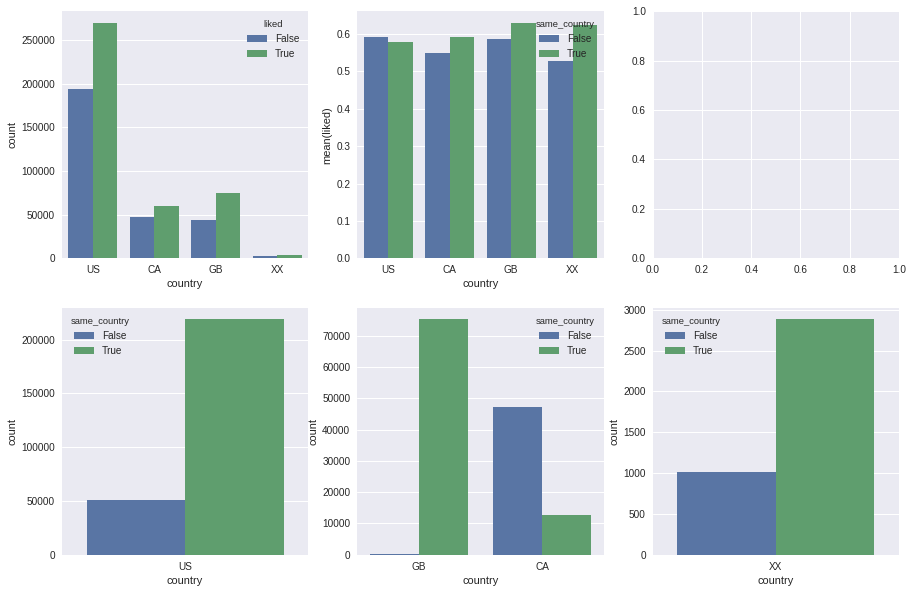

In [15]:
fig, ax =plt.subplots(nrows=2, ncols=3, figsize=(15,10))
sns.countplot(x="country", hue='liked', data=data, ax=ax[0,0]);
sns.barplot(x="country", y='liked', hue='same_country', data=data, ci=None, ax=ax[0,1]);

sns.countplot(x="country", hue='same_country', data=data[(data.liked)&(data.country=='US')], ax=ax[1, 0]);
sns.countplot(x="country", hue='same_country', data=data[(data.liked)&((data.country=='CA')|(data.country=='GB'))], ax=ax[1, 1]);
sns.countplot(x="country", hue='same_country', data=data[(data.liked)&(data.country!='US')&(data.country!='CA')&(data.country!='GB')], ax=ax[1,2]);

fig.show()

## 2. Religion

In [16]:
print list(data)

['p1_age', 'country', 'p1_education', 'p1_ethnicity', 'p1_flavor', 'p1_languages', 'liked', 'p1_premium', 'p1_religiosity', 'p2_age', 'p2_education', 'p2_ethnicity', 'p2_flavor', 'p2_languages', 'p2_premium', 'p2_religiosity', 'same_country', 'same_religion']


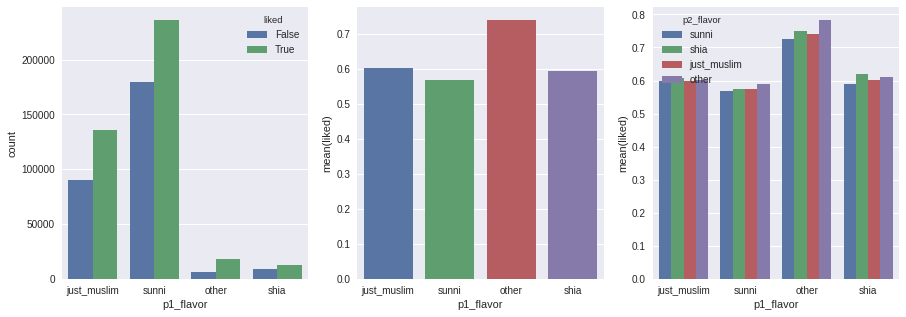

In [17]:
fig, ax =plt.subplots(nrows=1, ncols=3, figsize=(15,5))
sns.countplot(x="p1_flavor", hue='liked', data=data, ax=ax[0]);
sns.barplot(x="p1_flavor", y='liked', data=data, ci=None, ax=ax[1]);
sns.barplot(x="p1_flavor", y='liked', hue='p2_flavor', data=data, ci=None, ax=ax[2]);
fig.show()

...well well well, religion seems to have to have no effect on the choices, other than the fact that **other**'s tend to like people more.  
Also there are so few 'other', I am merging them with 'just muslim'.

In [18]:
data.p1_flavor[(data.p1_flavor=='other')]='just_muslim'
data.p2_flavor[(data.p2_flavor=='other')]='just_muslim'

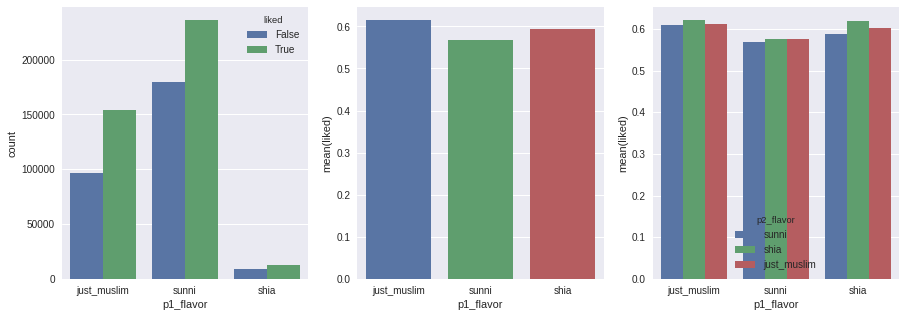

In [19]:
fig, ax =plt.subplots(nrows=1, ncols=3, figsize=(15,5))
sns.countplot(x="p1_flavor", hue='liked', data=data, ax=ax[0]);
sns.barplot(x="p1_flavor", y='liked', data=data, ci=None, ax=ax[1]);
sns.barplot(x="p1_flavor", y='liked', hue='p2_flavor', data=data, ci=None, ax=ax[2]);
fig.show()

### 2.1 Religiosity

What about religiosity? Let us first convert the data to nearest integer.

In [20]:
data=data.round({'p1_religiosity': 0, 'p2_religiosity': 0})
data.p1_religiosity=data.p1_religiosity.astype(int)
data.p2_religiosity=data.p2_religiosity.astype(int)

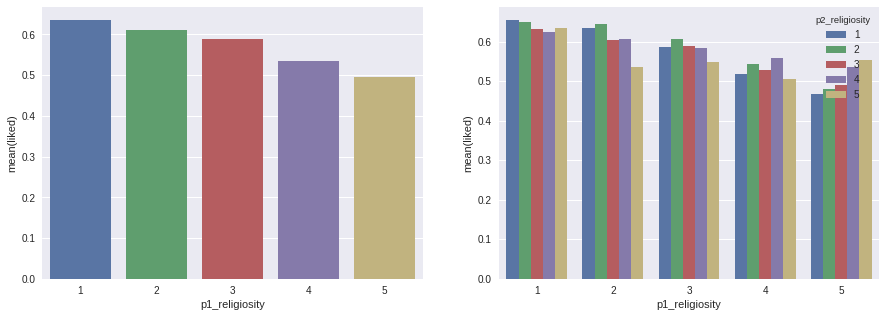

In [21]:
fig, ax =plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.barplot(x="p1_religiosity", y='liked', data=data, ci=None, ax=ax[0]);
sns.barplot(x="p1_religiosity", y='liked', hue='p2_religiosity', data=data, ci=None, ax=ax[1]);
fig.show()

so it seems like religiosity correlation still tells us more that relgion, butthen the minor difference in graphs of religion might help us. Keeping both then.

## 3. Premium Subscribers

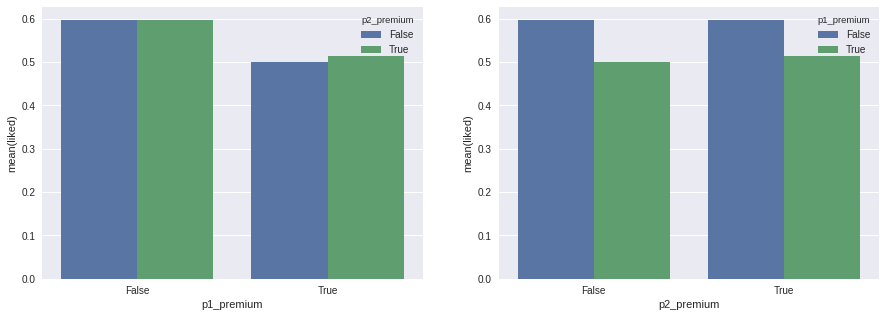

In [22]:
fig, ax =plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.barplot(x="p1_premium", y='liked', hue='p2_premium', data=data, ci=None, ax=ax[0]);
sns.barplot(x="p2_premium", y='liked', hue='p1_premium', data=data, ci=None, ax=ax[1]);
fig.show()


But this was suspected since premium users are shows more often. So let us keep **p2**'s premiumness data, and use it in our training to improve their probability so that the actually need not be calculated at the end to incorporate premium.  
**p1**'s premiumness is not entirely inconsequential either. Premium user chose to chose more often (the graph on the right). But this fact does not improve our prediction.

## 4. Education

In [23]:
data.p1_education.unique()

array(['college_degree', 'undergraduate', 'graduate_degree', 'high_school',
       'other', nan], dtype=object)

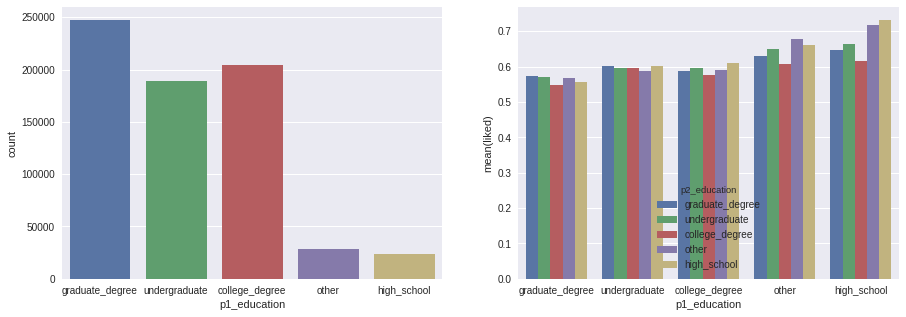

In [24]:
fig, ax =plt.subplots(nrows=1, ncols=2, figsize=(15,5))
edu_o=['graduate_degree', 'undergraduate', 'college_degree', 'other', 'high_school']
sns.countplot(x="p1_education", data=data, order=edu_o, ax=ax[0]);
sns.barplot(x="p1_education", y='liked', hue='p2_education', data=data, ci=None, order=edu_o, hue_order=edu_o, ax=ax[1]);
fig.show()

So it seems to be a factor certainly. But let us merge Undergrad, college and other.  they seem to be equally important. Let us call this BS.

In [25]:
data.p1_education[(data.p1_education=='college_degree')|(data.p1_education=='undergraduate')|(data.p1_education=='other')]='BS'
data.p2_education[(data.p2_education=='college_degree')|(data.p2_education=='undergraduate')|(data.p2_education=='other')]='BS'

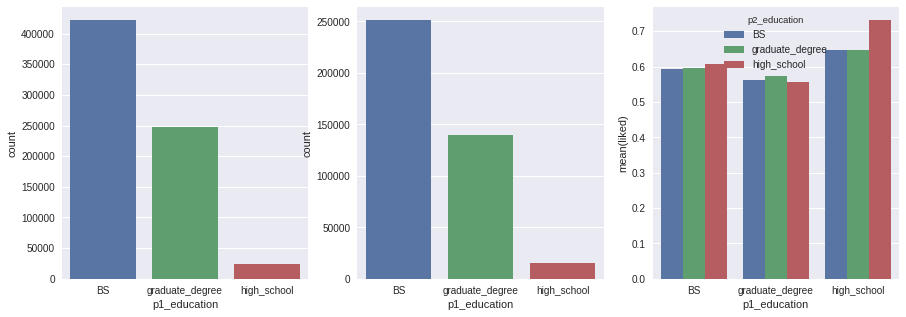

In [26]:
fig, ax =plt.subplots(nrows=1, ncols=3, figsize=(15,5))
sns.countplot(x="p1_education", data=data, ax=ax[0]);
sns.countplot(x="p1_education", data=data[data.liked], ax=ax[1]);
sns.barplot(x="p1_education", y='liked', hue='p2_education', data=data, ci=None, ax=ax[2]);
fig.show()

## Processing columns

Now we have all columns (other than multivalued arrays: **ethnicity** and **language**) let us dummyfy and type-cast them appropriately.

In [27]:
print sorted(list(data))

['country', 'liked', 'p1_age', 'p1_education', 'p1_ethnicity', 'p1_flavor', 'p1_languages', 'p1_premium', 'p1_religiosity', 'p2_age', 'p2_education', 'p2_ethnicity', 'p2_flavor', 'p2_languages', 'p2_premium', 'p2_religiosity', 'same_country', 'same_religion']


In [28]:
data.describe()

,p1_age,p1_religiosity,p2_age,p2_religiosity
count,695762.000000,695762.000000,695762.000000,695762.000000
mean,27.524370,2.873725,25.515070,2.934795
std,5.397148,0.824933,5.453867,0.819228
min,15.000000,1.000000,14.000000,1.000000
25%,24.000000,3.000000,22.000000,3.000000
50%,27.000000,3.000000,25.000000,3.000000
75%,30.000000,3.000000,27.000000,3.000000
max,112.000000,5.000000,112.000000,5.000000


Let us create a new copy of data for training/testing, called **dt**.

In [29]:
dt = data[['p1_age', 'p2_age', 'p1_religiosity', 'p2_religiosity']].copy()

#### Countries

In [30]:
datac = pd.get_dummies(data.country, prefix="ct")
dt = pd.concat([dt,datac],axis=1)
dt = pd.concat([dt,data.same_country.astype(int)],axis=1)

#### Education

In [31]:
datae1 = pd.get_dummies(data.p1_education, prefix="edu1")
dt = pd.concat([dt,datae1],axis=1)
datae2 = pd.get_dummies(data.p2_education, prefix="edu2")
dt = pd.concat([dt,datae2],axis=1)

#### Religion

In [32]:
datar = pd.get_dummies(data.p1_flavor, prefix="rel")
dt = pd.concat([dt,datar],axis=1)
dt = pd.concat([dt,data.same_religion.astype(int)],axis=1)

#### Premium User

In [33]:
dt = pd.concat([dt,data.p2_premium.astype(int)],axis=1)

OK  
We are done with the standard data. Multi valued data needs processing. Let us create a new Data Frame and do some analysis there.

#### Languages

In [34]:
dfl = pd.DataFrame()
dl1=data.p1_languages
dl2=data.p2_languages

dfl["liked"]=data.liked.astype(int)
dfl["same_language"]=0
langs=["Arabic", "Urdu", "Turkish", "Spanish", "Russian", "Pashtu", "Malaysian", "Italian", "Indonesian", "Hindi", "German", "French", "Filipino", "Farsi", "English", "Dutch", "Chinese", "Bengali"]

for l in langs:
    ln1="lang1_"+l
    ln2="lang2_"+l
    dfl[ln1]=(dl1.str.contains(l)==True)
    dfl[ln2]=(dl2.str.contains(l)==True)

    dfl["same_language"]=dfl["same_language"]+((dfl[ln1])*(dfl[ln1]==dfl[ln2]))

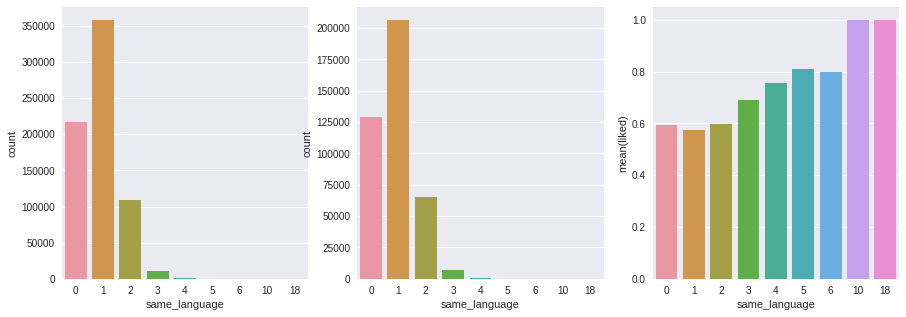

In [35]:
fig, ax =plt.subplots(nrows=1, ncols=3, figsize=(15,5))
sns.countplot(x="same_language", data=dfl, ax=ax[0]);
sns.countplot(x="same_language", data=dfl[dfl.liked==1], ax=ax[1]);
sns.barplot(x="same_language", y='liked', data=dfl, ci=None, ax=ax[2]);
fig.show()

#### Ethnicity

In [36]:
dfe = pd.DataFrame()
de1=data.p2_ethnicity
de2=data.p2_ethnicity

dfe["liked"]=data.liked.astype(int)
dfe["same_ethnicity"]=0
    
ethnics=["Afghan", "African American", "Arab (Khaleej)", "Arab (Levant)", "Arab (North Africa)", "Caucasian", "East African", "East Asian", "Hispanic", "Kurdish", "Persian", "South Asian", "Sub-Sahara African", "Turkish", "West African", "Other"]
for e in ethnics:
    et1="ethn1_"+e
    et2="ethn2_"+e
    dfe[et1]=(de1.str.contains(e)==True)
    dfe[et2]=(de2.str.contains(e)==True)
    dfe["same_ethnicity"]=dfe["same_ethnicity"]+((dfe[et1])*(dfe[et1]==dfe[et2]))

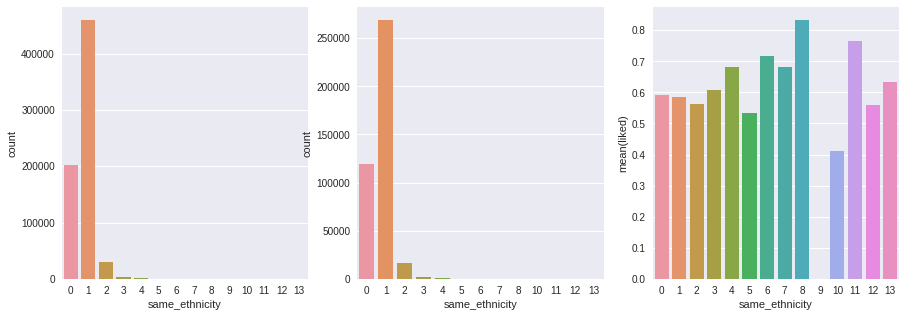

In [37]:
fig, ax =plt.subplots(nrows=1, ncols=3, figsize=(15,5))
sns.countplot(x="same_ethnicity", data=dfe, ax=ax[0]);
sns.countplot(x="same_ethnicity", data=dfe[dfe.liked==1], ax=ax[1]);
sns.barplot(x="same_ethnicity", y='liked', data=dfe, ci=None, ax=ax[2]);
fig.show()

In [38]:
dt = pd.concat([dt,dfl.same_language.astype(int)],axis=1)
dt = pd.concat([dt,dfe.same_ethnicity.astype(int)],axis=1)

**Save** now, but add the **like** data first:

In [39]:
dt = pd.concat([dt,data.liked.astype(int)],axis=1)
dt.to_csv(datafile+"-categorical.csv", index=False)

In [40]:
print dt.shape
print dt.liked.sum()
dt.head()

(695762, 23)
408099


,p1_age,p2_age,p1_religiosity,p2_religiosity,ct_CA,ct_GB,ct_US,ct_XX,same_country,edu1_BS,edu1_graduate_degree,edu1_high_school,edu2_BS,edu2_graduate_degree,edu2_high_school,rel_just_muslim,rel_shia,rel_sunni,same_religion,p2_premium,same_language,same_ethnicity,liked
0,20.0,19.0,2,3,0,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,1
1,29.0,28.0,3,3,1,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,2,0,0
2,25.0,21.0,4,4,0,0,1,0,1,1,0,0,1,0,0,0,0,1,1,0,2,2,0
3,26.0,26.0,3,3,0,0,1,0,1,0,1,0,0,1,0,0,0,1,1,0,1,1,0
4,39.0,24.0,3,3,0,0,1,0,1,0,1,0,0,1,0,0,0,1,1,0,1,1,0
